# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [42]:
## Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.
---
Using wget untuk mengunduh dataset

In [43]:
!wget https://raw.githubusercontent.com/archiseino/Dicoding---Basic-ML/refs/heads/main/clustered_data_steam.csv

--2024-12-18 19:58:01--  https://raw.githubusercontent.com/archiseino/Dicoding---Basic-ML/refs/heads/main/clustered_data_steam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126004 (123K) [text/plain]
Saving to: ‘clustered_data_steam.csv.4’

clustered_data_stea 100%[===================>] 123.05K  --.-KB/s    in 0.1s    

2024-12-18 19:58:01 (1.03 MB/s) - ‘clustered_data_steam.csv.4’ saved [126004/126004]



In [44]:
## Read the CSV File
df = pd.read_csv('clustered_data_steam.csv')
df.head()

,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass_AAA,publisherClass_Hobbyist,publisherClass_Indie,Label,name,releaseDate,publisherClass,publishers,developers
0,17717,17.99,263733.0,4.766069,92,0,0,1,Indie,Hookah Haze,10-07-2024,Indie,Aniplex Inc.,ACQUIRE Corp.
1,14679,19.99,263197.0,6.791463,80,0,0,1,Indie,Future Fragments,22-02-2024,Indie,"Taboo Toad,Shady Corner Games",The Future Fragments Team
2,12312,24.99,263004.0,3.329620,96,0,0,1,Indie,Botany Manor,09-04-2024,Indie,Whitethorn Games,Balloon Studios
3,66201,4.99,262728.0,10.807865,86,0,0,1,Indie,Scarlet Tower,25-03-2024,Indie,Pyxeralia LLC,Pyxeralia LLC
4,15742,19.99,260940.0,7.258495,90,0,0,1,Indie,Vellum,28-03-2024,Indie,"Alvios, Inc.",Alvios Games


In [45]:
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
copiesSold                 0
price                      0
revenue                    0
avgPlaytime                0
reviewScore                0
publisherClass_AAA         0
publisherClass_Hobbyist    0
publisherClass_Indie       0
Label                      0
name                       0
releaseDate                0
publisherClass             0
publishers                 0
developers                 0
dtype: int64


In [46]:
# Hapus kolom 'RowNumber', 'CustomerId', dan 'Surname'
df = df.drop(columns=['name', 'releaseDate', 'publisherClass', "publishers", "developers", "publisherClass_Indie"])
df.info()

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   copiesSold               1018 non-null   int64  
 1   price                    1018 non-null   float64
 2   revenue                  1018 non-null   float64
 3   avgPlaytime              1018 non-null   float64
 4   reviewScore              1018 non-null   int64  
 5   publisherClass_AAA       1018 non-null   int64  
 6   publisherClass_Hobbyist  1018 non-null   int64  
 7   Label                    1018 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 63.8+ KB


,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass_AAA,publisherClass_Hobbyist,Label
0,17717,17.99,263733.0,4.766069,92,0,0,Indie
1,14679,19.99,263197.0,6.791463,80,0,0,Indie
2,12312,24.99,263004.0,3.329620,96,0,0,Indie
3,66201,4.99,262728.0,10.807865,86,0,0,Indie
4,15742,19.99,260940.0,7.258495,90,0,0,Indie


In [47]:
## Change the Label Encoding for Target Variabel (Label)
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
df.head()

,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass_AAA,publisherClass_Hobbyist,Label
0,17717,17.99,263733.0,4.766069,92,0,0,0
1,14679,19.99,263197.0,6.791463,80,0,0,0
2,12312,24.99,263004.0,3.329620,96,0,0,0
3,66201,4.99,262728.0,10.807865,86,0,0,0
4,15742,19.99,260940.0,7.258495,90,0,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [48]:
## Create Normalization Instance
scaler = MinMaxScaler()

## Normalize all numeric columns
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

## Let's do Splitting
X = df.drop(columns=['Label'])
y = df['Label']

## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Show the train and validation set to make sure the split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")



Training set shape: X_train=(814, 7), y_train=(814,)
Test set shape: X_test=(204, 7), y_test=(204,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [49]:
## Train classifier
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)

print("Model KNN Trained")
print("Model Random Forest Trained")


Model KNN Trained
Model Random Forest Trained


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== KNN Classifier ====
Confusion Matrix:
[[150   1]
 [  8  45]]
True Positive (TP): 45
False Positive (FP): 1
False Negative (FN): 8
True Negative (TN): 150
Accuracy: 0.9559
Precision: 0.9783
Recall: 0.8491
F1-Score: 0.9091

----------------------------------------



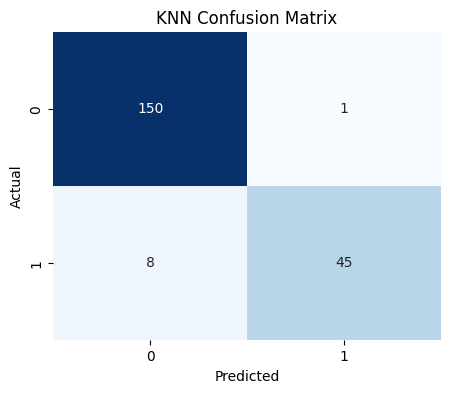

In [50]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[149   2]
 [  3  50]]
True Positive (TP): 50
False Positive (FP): 2
False Negative (FN): 3
True Negative (TN): 149
Accuracy: 0.9755
Precision: 0.9615
Recall: 0.9434
F1-Score: 0.9524

----------------------------------------



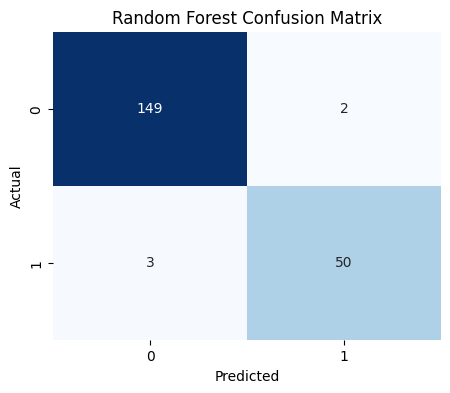

In [51]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [52]:
# Function to evaluate and return results as a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Evaluate each model and collect results
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)

# Display the summary DataFrame
print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)  0.955882   0.978261  0.849057  0.909091
1         Random Forest (RF)  0.975490   0.961538  0.943396  0.952381


### Analisis Evaluasi Model
Kedua model tersebut bekerja dengan cukup baik dalam klasifikasi label yang telah dilakukan.
1. **K-Nearest Neighbors (KNN)**
   - **Accuracy**: 95.52%
   - **Precision**: 97.82%
   - **Recall**: 84.49%
   - **F1-Score**: 90.90%

  Analisis: Tepat dan Akurat, kalimat yang cocok dengan penggunaan KNN dalam kasus klasifikasi kali ini, meskipun memang penggunaan dataset dalam test tidak cukup banyak namun akurasi dan presisi di angka 95% menunjukan model dapat menangkap pola dalam dataset. Ditambah dengan adanya recall yang cukup tinggi menandakan model sedikit kesusahan dengan false negatives, namun secara keseuruhan KNN sudah cukup bagus.

2. **Random Forest (RF)**
   - **Accuracy**: 97.54%
   - **Precision**: 96.13%
   - **Recall**: 94.33%
   - **F1-Score**: 95.23%

   Analisis: Go beyond Plus Ultra, Random Forest menunjukan performa yang jauh lebih superior dibanding KNN dari segala bidang. Untuk kasus ini saya cukup bingung entah apakah karena dataset yang terlalu sederhana atau model yang terlalu kuat untuk tugas seperti ini, karena semua analisis berada di nilai 90% tanpa melakukan hyperparameter tuning.
